In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import feather
from datetime import date, datetime
import joblib

In [2]:
data_path = '/Volumes/FileStorage/Insight_data/'
ohio_path = '/Volumes/FileStorage/Insight_data/Ohio_data/data_feather/'

In [52]:
oh_df=feather.read_dataframe('/Volumes/FileStorage/Insight_data/Ohio_data/data_feather/oh_census_df.feather')

In [53]:
model = joblib.load('logreg_fulldata_census.joblib')

In [54]:
features=['PARTY_AFFILIATION','STATE_REPRESENTATIVE_DISTRICT','PRECINCT_NAME','AGE_2020','GENERAL-11/08/2016','RATIO_2020','HC02_EST_VC17','HC02_EST_VC18']
model_features=['AGE_2020','GENERAL-11/08/2016','RATIO_2020','HC02_EST_VC17','HC02_EST_VC18']

In [55]:
df_X=oh_df.loc[:, features]

In [56]:
df_X['PARTY_AFFILIATION']=df_X['PARTY_AFFILIATION'].fillna('N')

In [57]:
df_X.groupby('PARTY_AFFILIATION').size()

PARTY_AFFILIATION
D    1338397
G       6775
L         23
N    4563298
R    1916892
dtype: int64

In [26]:
N=4563298
D=1338397
G=6775
L=23
R=1916892

tot_p=N+D+G+L+R

In [27]:
tot_p

7825385

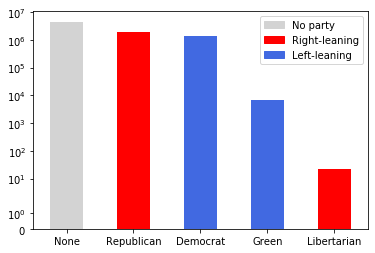

In [30]:
import matplotlib.patches as mpatches

s=pd.Series([N,R,D,G,L],index=['None','Republican','Democrat','Green','Libertarian'])
c=['lightgrey','red','royalblue','royalblue','red']
s.plot(kind='bar',color=c)
plt.xticks(rotation=360)
nopref=mpatches.Patch(color='lightgrey', label='No party')
right=mpatches.Patch(color='red',label='Right-leaning')
left=mpatches.Patch(color='royalblue',label='Left-leaning')
plt.legend(handles=[nopref,right,left])
axes = plt.gca()
plt.yscale('symlog')
#axes.set_ylim([0,ymax])
plt.show()

In [58]:
df_X_model=oh_df.loc[:, model_features]

In [59]:
df_Y_model=model.predict(df_X_model)

In [60]:
df_Y_model.shape

(7825385,)

In [61]:
df_results=df_X
df_results['2020_pred']=df_Y_model

In [62]:
df_results.head()

,PARTY_AFFILIATION,STATE_REPRESENTATIVE_DISTRICT,PRECINCT_NAME,AGE_2020,GENERAL-11/08/2016,RATIO_2020,HC02_EST_VC17,HC02_EST_VC18,2020_pred
0,N,82,PRECINCT ST. MARYS 3A,50,-1,0.057143,90.5,15.7,-1
1,N,53,MONROE 2,45,0,0.257143,94.9,35.4,0
2,N,9,CLEVELAND-02-Q,49,-1,0.000000,78.6,9.9,-1
3,N,65,MIAMI TOWNSHIP X,47,0,0.171429,94.9,46.6,0
4,N,12,CLEVELAND-01-E,45,0,0.333333,85.5,14.0,0


In [63]:
feather.write_dataframe(df_results,'/Volumes/FileStorage/Insight_data/Ohio_data/data_feather/results.feather')
feather.write_dataframe(df_results,'/Users/kristinalooper/WorkArea/insight/results.feather')

In [64]:
df_results['2020_pred'].replace(-1, np.nan,inplace=True)
df_results['2020_pred'].replace(0,1,inplace=True)

In [333]:
prec_votes = df_results.groupby(['STATE_REPRESENTATIVE_DISTRICT','PRECINCT_NAME'])['2020_pred'].sum()

In [338]:
sorted_votes=prec_votes.reset_index().sort_values(['STATE_REPRESENTATIVE_DISTRICT','2020_pred'],ascending=[True,False]).set_index(['STATE_REPRESENTATIVE_DISTRICT','PRECINCT_NAME'])

In [364]:
#sorted_votes=sorted_votes.reset_index().set_index(['STATE_REPRESENTATIVE_DISTRICT','PRECINCT_NAME'])
sorted_votes.index.get_level_values(1)

Index(['WOOSTER CITY 4-C', 'WOOSTER CITY 3-C', 'WOOSTER CITY 4-D',
       'ORRVILLE CITY 3', 'WAYNE TWP 1', 'SUGAR CREEK TWP 1',
       'SUGAR CREEK TWP 2', 'SUGAR CREEK TWP 3 DALTON', 'CHESTER TWP 1',
       'RITTMAN CITY 3',
       ...
       'PRECINCT ASHTABULA 3-B', 'PRECINCT ASHTABULA 2-D',
       'PRECINCT ASHTABULA 4-B', 'PRECINCT ASHTABULA 3-C',
       'PRECINCT ASHTABULA 4-A', 'PRECINCT CONNEAUT 4-C',
       'PRECINCT ASHTABULA 5-A', 'PRECINCT ASHTABULA 5-B',
       'PRECINCT AQUILLA VILLAGE', 'PRECINCT ASHTABULA 3-A'],
      dtype='object', name='PRECINCT_NAME', length=9063)

In [365]:
#sorted_votes['2020_pred'].nlargest(3)
top_sorted=sorted_votes['2020_pred'].groupby(level='STATE_REPRESENTATIVE_DISTRICT').nlargest(3).reset_index(level=0, drop=True).reset_index(level=1)
#top_sorted=sorted_votes.groupby('STATE_REPRESENTATIVE_DISTRICT')['2020_pred'].nlargest(3)

In [369]:
top_dict=dict(top_sorted.groupby('STATE_REPRESENTATIVE_DISTRICT')['PRECINCT_NAME'].apply(list))

In [371]:
top_dict[1]

['WOOSTER CITY 4-C', 'WOOSTER CITY 3-C', 'WOOSTER CITY 4-D']

In [377]:
party_df=df_results.groupby(['PRECINCT_NAME','PARTY_AFFILIATION']).size()
#party_dict=df_results.groupby(['PRECINCT_NAME','PARTY_AFFILIATION']).size().to_dict()
#party_sort=df_results.groupby(['PRECINCT_NAME','PARTY_AFFILIATION']).size().reset_index()#.set_index(['PRECINT_NAME','PARTY_AFFILIATION'])


In [380]:
df_test = df_results
df_test.head(10)

,PARTY_AFFILIATION,STATE_REPRESENTATIVE_DISTRICT,PRECINCT_NAME,AGE_2020,GENERAL-11/08/2016,RATIO_2020,HC02_EST_VC17,HC02_EST_VC18,2020_pred
0,N,82,PRECINCT ST. MARYS 3A,50,-1,0.057143,90.5,15.7,NaN
1,N,53,MONROE 2,45,0,0.257143,94.9,35.4,1.0
2,N,9,CLEVELAND-02-Q,49,-1,0.000000,78.6,9.9,NaN
3,N,65,MIAMI TOWNSHIP X,47,0,0.171429,94.9,46.6,1.0
4,N,12,CLEVELAND-01-E,45,0,0.333333,85.5,14.0,1.0
5,D,16,NORTH OLMSTED-02-C,41,0,0.228571,92.1,29.8,1.0
6,N,65,WAYNE TOWNSHIP B,77,0,0.257143,87.8,13.8,1.0
7,R,64,PRECINCT WMSFLD TWP 2,77,0,0.344828,85.1,10.5,1.0
8,N,65,MIAMI TOWNSHIP L1L,48,-1,0.074074,94.9,46.6,1.0
9,N,12,PEPPER PIKE-00-D,28,0,0.200000,95.7,48.2,1.0


In [388]:
#df = df.groupby(['A', 'B']).size().reset_index(name='Size')
df_test=df_test.groupby(['PRECINCT_NAME','PARTY_AFFILIATION']).size().reset_index(name='Size')

In [391]:
df_test.head(10)

,PRECINCT_NAME,PARTY_AFFILIATION,Size
0,ABERDEEN VILLAGE,D,136
1,ABERDEEN VILLAGE,G,1
2,ABERDEEN VILLAGE,N,667
3,ABERDEEN VILLAGE,R,292
4,ADA NORTH,D,133
5,ADA NORTH,G,2
6,ADA NORTH,N,794
7,ADA NORTH,R,232
8,ADA SOUTH,D,102
9,ADA SOUTH,G,1


In [431]:
party_rows=df_test.set_index(['PRECINCT_NAME', 'PARTY_AFFILIATION']).unstack(['PARTY_AFFILIATION'])

In [441]:
party_rows=party_rows.reset_index()

In [442]:
party_rows=party_rows.fillna(0)

In [443]:
party_rows

PRECINCT_NAME   Size                               Lean
PARTY_AFFILIATION                        D     G    L       N      R         
0                  ABERDEEN VILLAGE  136.0   1.0  0.0   667.0  292.0    right
1                         ADA NORTH  133.0   2.0  0.0   794.0  232.0    right
2                         ADA SOUTH  102.0   1.0  0.0   764.0  301.0    right
3                           ADAMS A   58.0   1.0  0.0   253.0  333.0    right
4                           ADAMS B   64.0   0.0  0.0   395.0  358.0    right
5                         ADAMS TWP   76.0   0.0  0.0   284.0  308.0    right
6                       ADDISON PCT   69.0   0.0  0.0   340.0  164.0    right
7                       ADDISON TWP   95.0   0.0  0.0   416.0  282.0    right
8                        ADDYSTON A   48.0   4.0  0.0   381.0  113.0    right
9                         AKRON 1-A  162.0   0.0  0.0   561.0   30.0     left
10                        AKRON 1-B   25.0   0.0  0.0   461.0    4.0     left
11                        AKRON 1-C  375.0   1.0  0.0   532.0   87.0     left
12                        AKRON 1-D  291.0   0.0  0.0   543.0   42.0     left
13                        AKRON 1-E  205.0   2.0  0.0   385.0  349.0    right
14                        AKRON 1-F  226.0   0.0  0.0   647.0  126.0     left
15                        AKRON 1-G  366.0   2.0  0.0   464.0   99.0     left
16                        AKRON 1-H  200.0   1.0  0.0   894.0   81.0     left
17                        AKRON 1-I  432.0   0.0  0.0   402.0  195.0     left
18                        AKRON 1-J  369.0   2.0  0.0   457.0  202.0     left
19                        AKRON 1-K  377.0   0.0  0.0   480.0  108.0     left
20                        AKRON 1-L  224.0   0.0  0.0   665.0   42.0     left
21                        AKRON 1-M   47.0   0.0  0.0   753.0   11.0     left
22                       AKRON 10-A  168.0   1.0  0.0   685.0  112.0     left
23                       AKRON 10-B  259.0   0.0  0.0   635.0  115.0     left
24                       AKRON 10-C  201.0   0.0  0.0   668.0   35.0     left
25                       AKRON 10-D  146.0   0.0  0.0   738.0   40.0     left
26                       AKRON 10-E  267.0   0.0  0.0   560.0  119.0     left
27                       AKRON 10-F  245.0   0.0  0.0   621.0  144.0     left
28                       AKRON 10-G  232.0   0.0  0.0   655.0   66.0     left
29                       AKRON 10-H  248.0   0.0  0.0   648.0  114.0     left
...                             ...    ...   ...  ...     ...    ...      ...
8734                 XENIA CITY 310   73.0   0.0  0.0   364.0  181.0    right
8735                 XENIA CITY 311   96.0   0.0  0.0   408.0  221.0    right
8736                 XENIA CITY 312   82.0   0.0  0.0   452.0  194.0    right
8737                 XENIA CITY 313   69.0   0.0  0.0   578.0  108.0    right
8738                 XENIA CITY 314   84.0   0.0  0.0   511.0  225.0    right
8739                 XENIA CITY 315   60.0   0.0  0.0   421.0  110.0    right
8740                 XENIA CITY 316   69.0   1.0  0.0   414.0   20.0     left
8741                 XENIA CITY 317   75.0   2.0  0.0   331.0  239.0    right
8742                 XENIA CITY 318   96.0   0.0  0.0   413.0   88.0  neutral
8743                 XENIA CITY 319   82.0   0.0  0.0   382.0  187.0    right
8744                 XENIA CITY 320  120.0   0.0  0.0   395.0  286.0    right
8745                 XENIA CITY 321  107.0   0.0  0.0   319.0  272.0    right
8746                 XENIA CITY 322   79.0   0.0  0.0   544.0  269.0    right
8747                 XENIA CITY 323   48.0   0.0  0.0   246.0  171.0    right
8748                  XENIA TWP 351   89.0   1.0  0.0   299.0  257.0    right
8749                  XENIA TWP 352   40.0   0.0  0.0   201.0  232.0    right
8750                  XENIA TWP 353   78.0   0.0  0.0   134.0   70.0     left
8751                  XENIA TWP 354   51.0   0.0  0.0  1440.0   16.0     left
8752                  XENIA TWP 355   82.0  

In [444]:
def party_lean(row):
    d=row[('Size', 'D')]
    g=row[('Size', 'G')]
    l=row[('Size', 'L')]
    r=row[('Size', 'R')]
    
    left=d+g
    right=r+l
    if right+left == 0:
        return "neutral"
    right_lean=right/(right+left)
    left_lean=1-right_lean
    if abs(right_lean-left_lean) < 0.05:
        return "neutral"
    elif right_lean > left_lean:
        return "right"
    else:
        return "left"

In [445]:
%%capture
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

In [446]:
#oh_train['N_ELIGIBLE_2012'] = oh_train.progress_apply(lambda row: n_eligible(row,date_2000,date_2012), axis=1)
party_rows['Lean']=party_rows.progress_apply(lambda row: party_lean(row),axis=1)

In [438]:
d=('Size', 'D')

In [447]:
for key in party_rows:
    print(key)

('PRECINCT_NAME', '')
('Size', 'D')
('Size', 'G')
('Size', 'L')
('Size', 'N')
('Size', 'R')
('Lean', '')


In [448]:
party_dict_df=party_rows.drop([('Size', 'D'),('Size', 'G'),('Size', 'L'),('Size', 'N'),('Size', 'R')],axis=1)

In [456]:
party_dict=dict(zip(party_dict_df.PRECINCT_NAME,party_dict_df.Lean))

In [457]:
top_dict[1]

['WOOSTER CITY 4-C', 'WOOSTER CITY 3-C', 'WOOSTER CITY 4-D']

In [478]:
for el in top_dict[11]:
    print(party_dict[el])

left
left
left


In [477]:
party_dict['GARFIELD HEIGHTS-05-B']

'left'